In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from time import sleep
import time
import subprocess as sp
%matplotlib notebook

In [28]:
tf.__version__

'1.8.0'

In [29]:
mpath = '/home/manur/Downloads/faster_rcnn_inception_v2_coco_2018_01_28/'

In [30]:
video = cv2.VideoCapture('/home/manur/TownCentreXVID.avi')

<IPython.core.display.Javascript object>


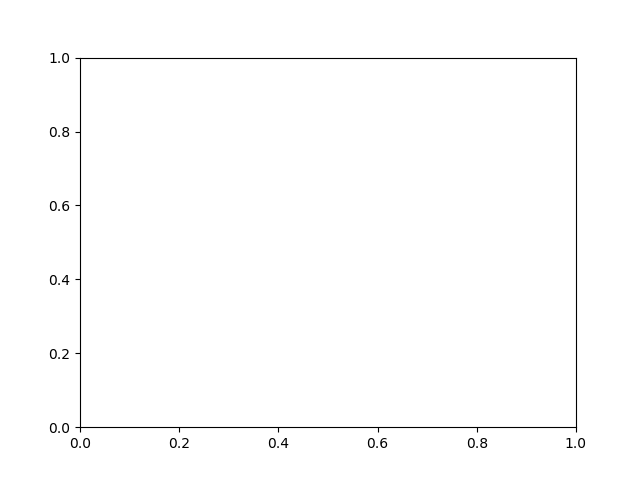

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.ion()

fig.show()
fig.canvas.draw()

In [32]:
xdata=[0]
ydata=[0]
def plot(value):
    xdata.append(xdata[-1]+1)
    ydata.append(value)
    ax.clear()
    ax.plot(xdata,ydata)
    fig.canvas.draw()
    time.sleep(0.1)

In [ ]:
def process_output(boxes, scores, classes, num, img):
    bl = []
    for i in range(boxes.shape[1]):
        bl.append([boxes[0,i,0]*720,boxes[0,i,1]*1280,boxes[0,i,2]*720,boxes[0,i,3]*1280])
    scores = scores[0].tolist() 
    classes = [int(x) for x in classes[0].tolist()]
    num = int(num[0])
    count = 0 
    hm = []
    for i in range(len(bl)):
            if classes[i] == 1 and scores[i] > 0.6:
                count += 1
                box = bl[i]
                hm.append(bl[i])
                cv2.rectangle(img,(int(box[1]),int(box[0])),(int(box[3]),int(box[2])),(255,0,0),2)
    plot(count)
    sp.call("bash /home/manur/Downloads/query.sh {}".format(str(count)))
    return img
    

In [ ]:
sess = tf.Session()
graph = tf.get_default_graph()
 
with graph.as_default():
    with sess.as_default():
        saver = tf.train.import_meta_graph(mpath + 'model.ckpt.meta')
        saver.restore(sess,mpath + 'model.ckpt')
        sess.run(tf.global_variables_initializer())
        image_tensor = graph.get_tensor_by_name('image_tensor:0')
        detection_boxes = graph.get_tensor_by_name('detection_boxes:0')
        detection_scores = graph.get_tensor_by_name('detection_scores:0')
        detection_classes = graph.get_tensor_by_name('detection_classes:0')
        num_detections = graph.get_tensor_by_name('num_detections:0')
        
        r, img = video.read()
        i =0 
        while(1): 
            i = i+1
            img = cv2.resize(img, (1280, 720))
            fd = {image_tensor:np.expand_dims(img, axis=0)}
            (boxes, scores, classes, num) = sess.run([detection_boxes, detection_scores, detection_classes, num_detections], feed_dict=fd)
            cv2.imshow("preview",process_output(boxes, scores, classes, num, img))
            key = cv2.waitKey(1)
            if key & 0xFF == ord('q'):
                break
            r,img = video.read()

INFO:tensorflow:Restoring parameters from /home/manur/Downloads/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt
